# Kaggle: Titanic - Machine Learning from Disaster
---
source: https://www.kaggle.com/c/titanic

- 간단한 분류 문제, sklearn으로 머신러닝 모델 구현
- ml workflow

### Goal
- 생존예측(binary classification - 0 or 1)

### metric
- accuracy





In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import
import os
import pandas as pd

## Data load

In [5]:
# data import
project_root = '/content/drive/MyDrive/lecture/projects/basic_ml/1_ML'
database_dir = os.path.join(project_root, 'data/titanic')
print(os.listdir(database_dir))

['train.csv', 'test.csv', 'gender_submission.csv', '.DS_Store']


In [6]:
train = pd.read_csv(os.path.join(database_dir, 'train.csv'))
test = pd.read_csv(os.path.join(database_dir, 'test.csv'))
submission = pd.read_csv(os.path.join(database_dir, 'gender_submission.csv'))

데이터 확인

In [7]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 각 컬럼 정보:

|Variable|Dtype|Definition|Key|
|---|---|---|---|
|PassengerId|int64| 탑승자 id ||
|Survived|int64| Survival | 0 = No, 1 = Yes |
|Pclass|int64| Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
|Name|object| 이름||
|Sex|object| 성별||
|Age|float64|나이||
|SibSp|int64| # of siblings / spouses aboard the Titanic, 형제자매, 배우자 수	||
|Parch|int64| # of parents / children aboard the Titanic, 부모, 자식 수	||
|Ticket|object| Ticket number ||
|Fare|float64| Passenger fare ||
|Cabin|object| Cabin number. 객실 번호||
|Embarked|object| Port of Embarkation. 승선항 | C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes
---

**pclass**: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

<br>

### 생존에 영향을 줄 만한 컬럼 선택
- 필요없는 컬럼: `PassengerID`, `Name`, `Ticket`(pclass로 충분), `Cabin`
- "`Cabin`" -> null값이 너무 많고, 사고 당시 파티중이었다고 함

### 결측치가 존재하는 컬럼

train.csv
- Age -> 891 - 714
- Cabin -> 891 - 204
- Embarked -> 891 - 889

test.csv
- Age -> 418 - 332
- Fare -> 418 - 417
- Cabin -> 418 - 91


In [9]:
print(submission.info())
submission.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Data Preprocessing
- feature selection
- 결측치 제거



### feature selection

In [10]:
# drop columns
train_drop = train.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
test_drop = test.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [11]:
train_drop.info()
train_drop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
test_drop.info()
test_drop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### 결측치 제거

train.csv
- Age -> 891 - 714
- ~Cabin -> 891 - 204~ -> drop
- Embarked -> 891 - 889

test.csv
- Age -> 418 - 332
- Fare -> 418 - 417
- ~Cabin -> 418 - 91~ -> drop
---

- Age: 나머지 컬럼에 나이를 추정할 수 있는 정보 부족 -> 평균으로 처리
- Fare: 결측치 1개 -> 평균으로 채워줌
- Embarked:

In [13]:
# Age, Fare

train_drop['Age'] = train_drop['Age'].fillna(train_drop['Age'].mean())
test_drop['Age'] = test_drop['Age'].fillna(train_drop['Age'].mean())
test_drop['Fare'] = test_drop['Fare'].fillna(train_drop['Fare'].mean())

In [14]:
train_drop.info()
print()
test_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-nul

In [15]:
train['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [16]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [17]:
# Embarked

train_drop.loc[train_drop['Embarked'].isnull(), "Embarked"] = "S"

In [18]:
train_drop.info()
train_drop.loc[(train_drop['Pclass'] == 1) & (train_drop['Sex'] == "female"), "Embarked"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Embarked
S    50
C    43
Q     1
Name: count, dtype: int64

In [19]:
train_drop.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Feature engineering
---
1. categorical feature encoding
    - object columns: sex, embarked -> one-hot encoding
2. normalization -> Age, Fare

### categorical feature encoding

In [20]:
train_one = pd.get_dummies(train_drop, columns=["Sex", "Embarked"], dtype=int)
test_one = pd.get_dummies(test_drop, columns=["Sex", "Embarked"], dtype=int)

In [21]:
train_one.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


### normalization

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
scaled_train = scaler.fit_transform(train_one.loc[:, ["Age", "Fare"]])

In [25]:
train_one["Age"] = scaled_train[:, 0]
train_one["Fare"] = scaled_train[:, 1]

In [26]:
train_one.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.271174,1,0,0.014151,0,1,0,0,1
1,1,1,0.472229,1,0,0.139136,1,0,1,0,0
2,1,3,0.321438,0,0,0.015469,1,0,0,0,1
3,1,1,0.434531,1,0,0.103644,1,0,0,0,1
4,0,3,0.434531,0,0,0.015713,0,1,0,0,1


In [27]:
scaled_test = scaler.fit_transform(test_one.loc[:, ["Age", "Fare"]])
test_one["Age"] = scaled_test[:, 0]
test_one["Fare"] = scaled_test[:, 1]

In [28]:
test_one.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.452723,0,0,0.015282,0,1,0,1,0
1,3,0.617566,1,0,0.013663,1,0,0,0,1
2,2,0.815377,0,0,0.018909,0,1,0,1,0
3,3,0.353818,0,0,0.016908,0,1,0,0,1
4,3,0.287881,1,1,0.023984,1,0,0,0,1


In [29]:
X = train_one.drop(columns='Survived')
y = train_one['Survived']

In [30]:
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    int64  
 6   Sex_male    891 non-null    int64  
 7   Embarked_C  891 non-null    int64  
 8   Embarked_Q  891 non-null    int64  
 9   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.271174,1,0,0.014151,0,1,0,0,1
1,1,0.472229,1,0,0.139136,1,0,1,0,0
2,3,0.321438,0,0,0.015469,1,0,0,0,1
3,1,0.434531,1,0,0.103644,1,0,0,0,1
4,3,0.434531,0,0,0.015713,0,1,0,0,1


In [31]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Training

In [32]:
# models
# 1. linear classifier: SGD를 사용한 linear classifier -> parameter update를 SGD로 해줌
from sklearn.linear_model import SGDClassifier
# 2. logistic regression
from sklearn.linear_model import LogisticRegression
# 3. decision tree
from sklearn.tree import DecisionTreeClassifier
# 4. random forest
from sklearn.ensemble import RandomForestClassifier

# metric (accuracy : titanic의 evaluation metric이 accuracy)
from sklearn.metrics import accuracy_score

In [33]:
# training

# 모델 선언
clf1 = SGDClassifier()
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()

In [34]:
# 학습
clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)

RandomForestClassifier()

In [35]:
# prediction 결과
pred1 = clf1.predict(X)
pred2 = clf2.predict(X)
pred3 = clf3.predict(X)
pred4 = clf4.predict(X)

In [37]:
print("1. Linear Classifier, Accuracy for training : %.4f" % accuracy_score(y, pred1))
print("2. Logistic Regression, Accuracy for training : %.4f" % accuracy_score(y, pred2))
print("3. Decision Tree, Accuracy for training : %.4f" % accuracy_score(y, pred3))
print("4. Random Forest, Accuracy for training : %.4f" % accuracy_score(y, pred4))

1. Linear Classifier, Accuracy for training : 0.7744
2. Logistic Regression, Accuracy for training : 0.8013
3. Decision Tree, Accuracy for training : 0.9820
4. Random Forest, Accuracy for training : 0.9820


## Test

In [38]:
test_one.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.452723,0,0,0.015282,0,1,0,1,0
1,3,0.617566,1,0,0.013663,1,0,0,0,1
2,2,0.815377,0,0,0.018909,0,1,0,1,0
3,3,0.353818,0,0,0.016908,0,1,0,0,1
4,3,0.287881,1,1,0.023984,1,0,0,0,1


In [39]:
result1 = clf1.predict(test_one)
result2 = clf2.predict(test_one)
result3 = clf3.predict(test_one)
result4 = clf4.predict(test_one)

## Submission file

In [44]:
submission1 = pd.read_csv(os.path.join(database_dir, 'gender_submission.csv'))
submission2 = pd.read_csv(os.path.join(database_dir, 'gender_submission.csv'))
submission3 = pd.read_csv(os.path.join(database_dir, 'gender_submission.csv'))
submission4 = pd.read_csv(os.path.join(database_dir, 'gender_submission.csv'))


In [45]:
submission1["Survived"] = result1
submission2["Survived"] = result2
submission3["Survived"] = result3
submission4["Survived"] = result4

In [ ]:
sub_save_path = os.path.join(database_dir, 'submissions')
# os.mkdir(os.path.join(sub_save_path))

In [47]:
# 제출파일 만들기

submission1.to_csv(sub_save_path+"/sub_1_SGD.csv", index=False)
submission2.to_csv(sub_save_path+"/sub_2_LogisticRegression.csv", index=False)
submission3.to_csv(sub_save_path+"/sub_3_DT.csv", index=False)
submission4.to_csv(sub_save_path+"/sub_4_RF.csv", index=False)

### result:

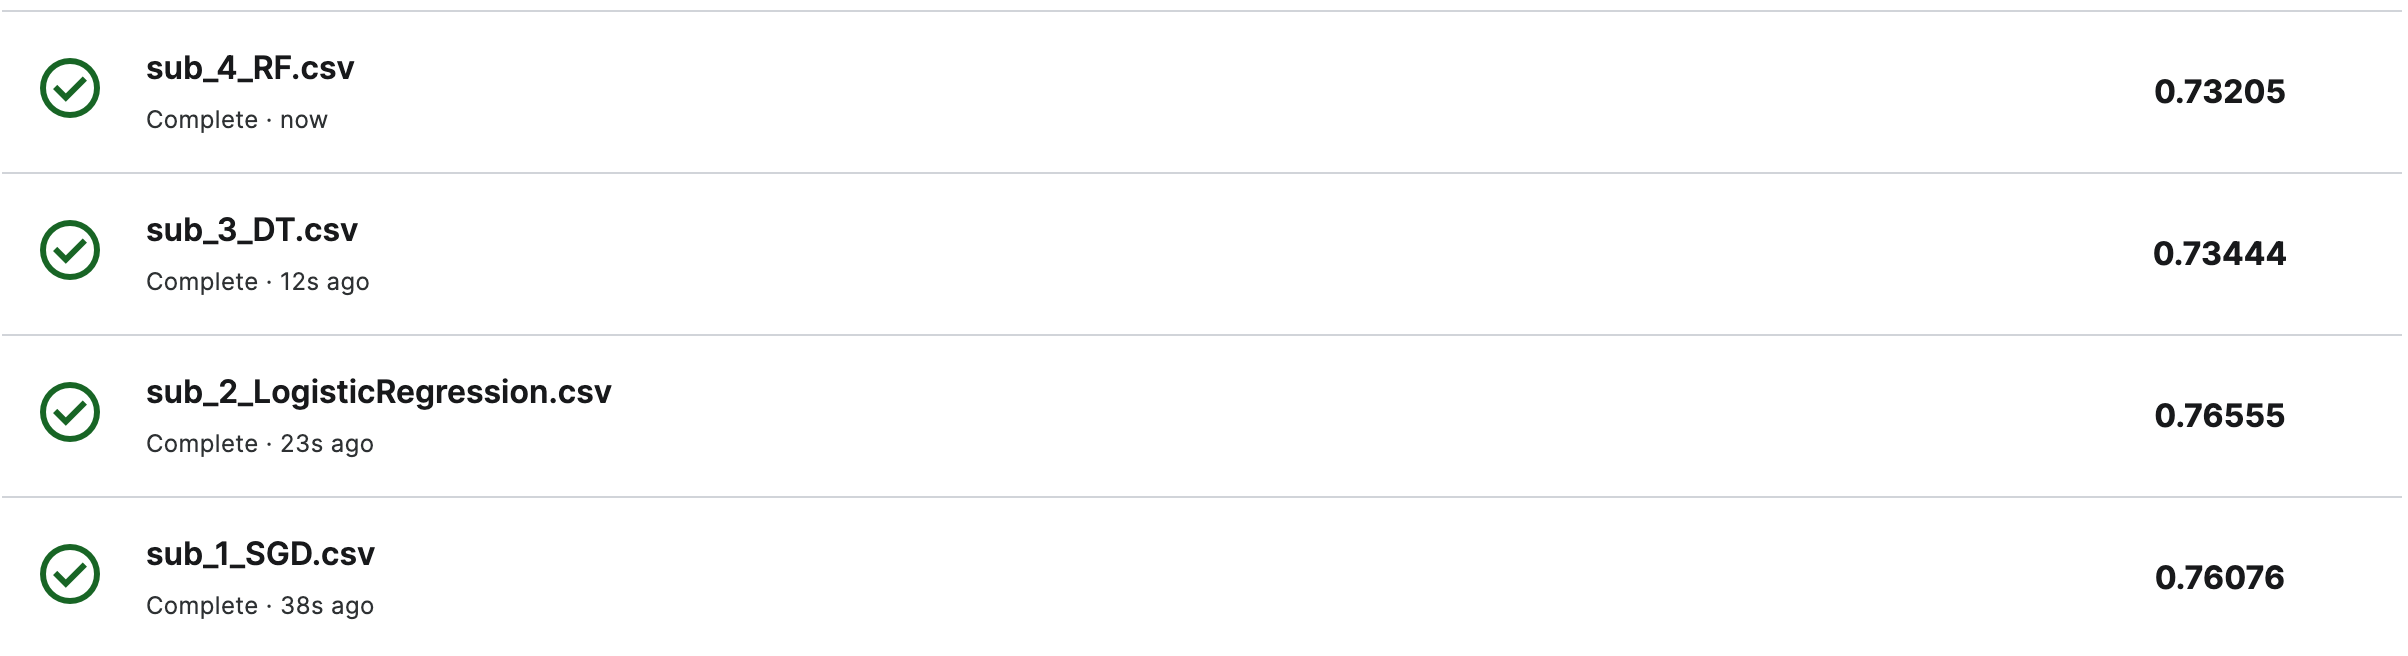